Здесь представлены итоги первых двух итераций. Буду дополнять по мере работы. То, что можно наглядно продемонстрировать, показано тут на изображениях.

Во второй итерации относительно первой реализовано отделение предметов от многоугольника и процедура расположения предметов

In [1]:
import cv2
import matplotlib.pyplot as plt
from intelligent_placer import compress_image, prepare_image, find_contours, separate_polygon, draw_contours, make_full_placement

Загружаем изображение

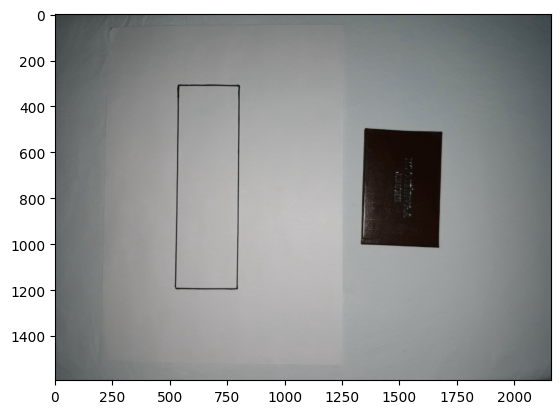

In [2]:
image = cv2.imread('cases\\case1.jpg')
plt.imshow(image)

# Подготовка изображения
Сжатие, изменение цветовой палитры и бинаризация изображения с помощью детектора Canny и морфологических операций

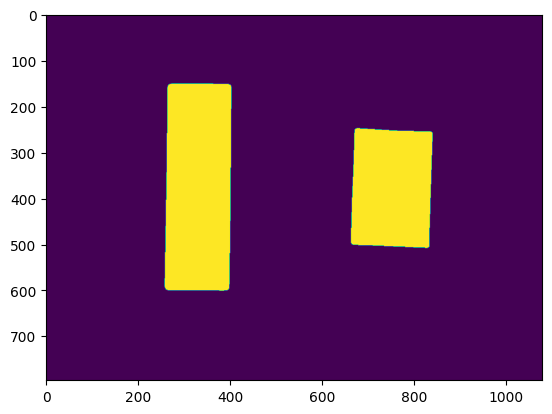

In [3]:
compressed_image = compress_image(image)
binary_image = prepare_image(compressed_image)
plt.imshow(binary_image)

# Нахождение контуров
Находим контуры на иображении с помощью функции findContours из cv2

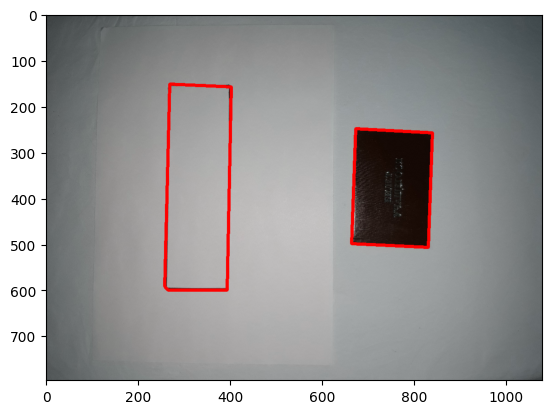

In [4]:
contours = find_contours(binary_image)
red_color = (255, 0, 0)

for curr_object in contours:
    draw_contours(compressed_image, curr_object, red_color, 6)
plt.imshow(compressed_image)

# Идентификация
Отделяем многоугольник от предметов

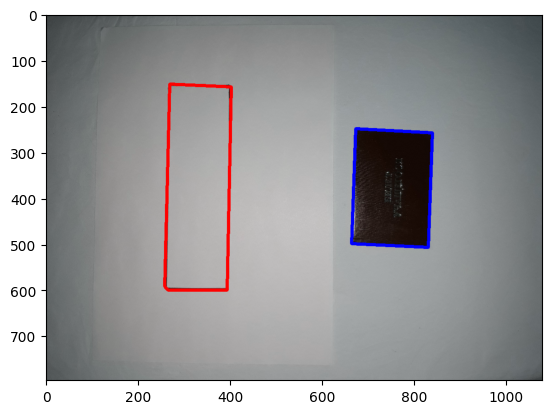

In [5]:
polygon, objects = separate_polygon(contours)

draw_contours(compressed_image, polygon, red_color, 6)
blue_color = (0, 0, 255)
for curr_object in objects:
    draw_contours(compressed_image, curr_object, blue_color, 6)
plt.imshow(compressed_image)

# Размещение
Пробуем уместить предметы в многоугольник

In [6]:
found_placement, placed_objects = make_full_placement(polygon, objects)
print(found_placement)

False


Помимо представленного здесь, в intelligent_placer.py присутствует реализация метода обработки ошибок, а также каркас основного метода плейсера. TODO: доработать алгоритм расположения (по возможности: отрисовка расположения, сортировка предметов, поворот и т.д.), внедрить обработку ошибок, соединить все в основной метод.